In [30]:
# Importing libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 
# Above is a special style template for matplotlib, highly useful for visualizing time series data
%matplotlib inline
from plotly import tools
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
from sklearn.metrics import mean_squared_error, mean_absolute_error
from prophet import Prophet

In [2]:
solar = pd.read_csv("trainData/solar.csv")

In [3]:
base_date = pd.to_datetime("2024-01-01")
solar['ds'] = base_date + pd.to_timedelta(solar['Day'] - 1, unit='d') + pd.to_timedelta(solar['Hour'], unit='h')

In [4]:
solar.drop(["Day", "Hour"], axis=1, inplace=True)

In [5]:
solar.rename(columns={"Output": "y"}, inplace=True)

In [6]:
solar = solar[solar["Site"] == "site1"]

In [7]:
df = solar[["ds", "y"]]
df = df[df["ds"] < "2024-02-23"]
df.head()

,ds,y
0,2024-01-01 00:00:00,0.0
1,2024-01-01 01:00:00,0.0
2,2024-01-01 02:00:00,0.0
3,2024-01-01 03:00:00,0.0
4,2024-01-01 04:00:00,0.0


In [8]:
m = Prophet()
m.fit(df)

18:00:30 - cmdstanpy - INFO - Chain [1] start processing
18:00:30 - cmdstanpy - INFO - Chain [1] done processing


In [9]:
future = m.make_future_dataframe(periods=7*24, freq='H')
future.tail()

,ds
1435,2024-02-29 19:00:00
1436,2024-02-29 20:00:00
1437,2024-02-29 21:00:00
1438,2024-02-29 22:00:00
1439,2024-02-29 23:00:00


In [10]:
forecast = m.predict(future)

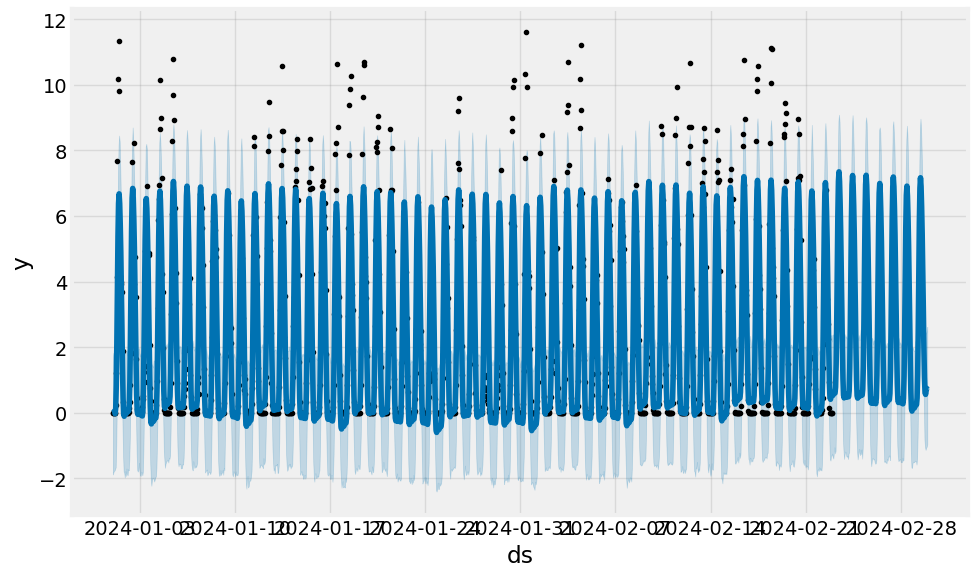

In [11]:
fig1 = m.plot(forecast)

In [12]:
actual = solar[solar["ds"] >= "2024-02-23"]

In [31]:
print(mean_absolute_error(actual["y"], forecast["yhat"][:7*24]))

1.3562278521643325


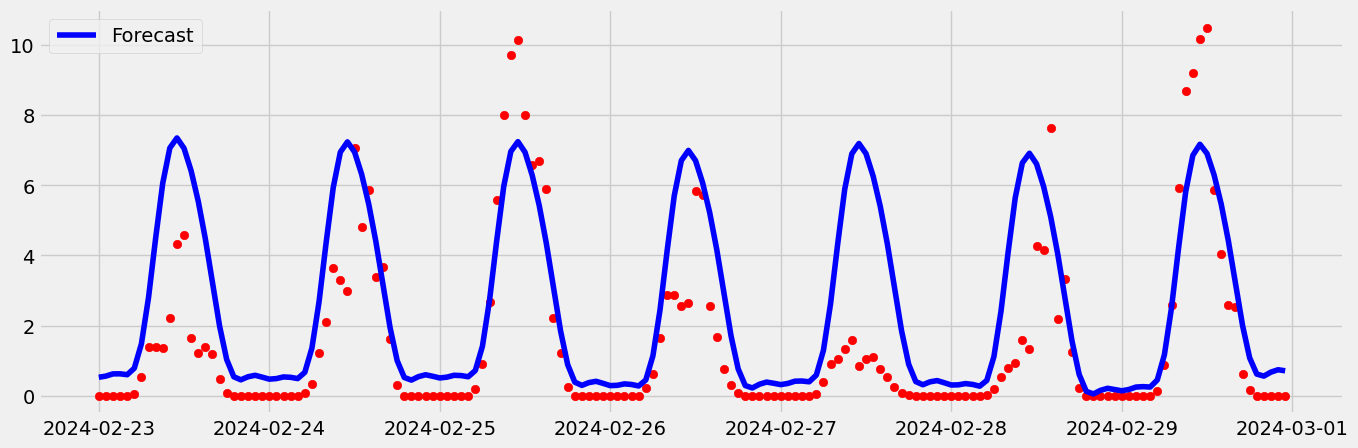

In [29]:
forecast = forecast[forecast["ds"] >= "2024-02-23"]
actual = actual[actual["ds"] >= "2024-02-23"]
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(actual["ds"], actual['y'], color='r')
ax.plot(actual["ds"], forecast["yhat"], color='b', label='Forecast')
ax.legend()